# Precise Wikipedia Views Analysis

## Data import

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

### Data loading

In [157]:
def process_wikiviews_data(path):
    data = pd.read_csv(path).transpose()
    data.columns = data.iloc[0]
    titles = data.iloc[1]
    data.drop(['Language', 'Title', 'Badges'], inplace=True)

    data['total'] = data.sum(axis=1)
    data['date'] = data.index
    data['date'] = pd.to_datetime(data['date'])

    return titles, data

#### Air Pollution

In [158]:
airpol_titles, airpol_data = process_wikiviews_data('Data/page-views-airpol.csv')
airpol_data

Language,en,es,hi,fr,ru,mr,ms,ar,id,it,...,iu,oc,ha,bcl,dag,mni,rw,ig,total,date
2019-01-01,4685,117,995,1436,45,1090,102,1053,79,143,...,0,0,0,0,0,0,0,0,13429.0,2019-01-01
2019-01-02,6652,315,1379,1539,76,1132,168,993,160,393,...,0,0,0,0,0,0,0,0,17825.0,2019-01-02
2019-01-03,7880,320,1464,1429,107,1256,109,829,154,444,...,0,0,0,0,0,0,0,0,20093.0,2019-01-03
2019-01-04,7843,309,1516,1394,130,1328,71,738,151,410,...,0,0,0,0,0,0,0,0,19090.0,2019-01-04
2019-01-05,5876,307,1314,1098,83,1114,109,570,111,388,...,0,0,0,0,0,0,0,0,15603.0,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,3591,1179,657,283,156,293,225,566,175,74,...,0,0,0,0,0,0,0,0,10779.0,2022-11-04
2022-11-05,3234,557,525,271,193,218,320,998,121,80,...,2,0,1,1,0,1,0,1,9577.0,2022-11-05
2022-11-06,3841,770,557,369,223,295,481,938,206,81,...,11,0,0,0,2,1,2,0,12304.0,2022-11-06
2022-11-07,3952.0,1325.0,480.0,264.0,418.0,326.0,431.0,838.0,253.0,143.0,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,13560.0,2022-11-07


#### Plastic Industry

In [161]:
plastin_titles, plastin_data = process_wikiviews_data('Data/plasticIndustry.csv')
plastin_data

Language,en,fr,fi,de,fa,uz,total,date
2019-01-01,72,1,1,0,0,0,74.0,2019-01-01
2019-01-02,145,1,5,0,0,0,151.0,2019-01-02
2019-01-03,129,0,4,2,0,0,135.0,2019-01-03
2019-01-04,181,1,3,1,0,0,186.0,2019-01-04
2019-01-05,98,1,4,0,0,0,103.0,2019-01-05
...,...,...,...,...,...,...,...,...
2022-11-04,72,9,1,11,2,1,96.0,2022-11-04
2022-11-05,59,18,1,7,3,0,88.0,2022-11-05
2022-11-06,56,15,3,3,8,0,85.0,2022-11-06
2022-11-07,65,10,6,7,8,1,97.0,2022-11-07


#### Plastic Pollution

In [163]:
plastpol_titles, plastpol_data = process_wikiviews_data('Data/plasticPollution.csv')
plastpol_data

Language,en,bn,ru,it,es,zh,ml,hi,fr,ar,...,lfn,az,wa,dag,sr,bcl,ha,mni,total,date
2019-01-01,1696,96,36,37,24,176,77,99,21,6,...,0,0,0,0,0,0,0,0,2323.0,2019-01-01
2019-01-02,2121,132,55,106,65,178,70,162,92,6,...,0,0,0,0,0,0,0,0,3038.0,2019-01-02
2019-01-03,2257,166,41,132,71,140,113,173,55,13,...,0,0,0,0,0,0,0,0,3217.0,2019-01-03
2019-01-04,1956,177,44,118,67,129,78,145,70,2,...,0,0,0,0,0,0,0,0,2844.0,2019-01-04
2019-01-05,1705,162,67,118,57,103,56,146,64,7,...,0,0,0,0,0,0,0,0,2520.0,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,778,162,71,50,83,50,26,41,35,40,...,0,5,0,0,0,1,1,1,1488.0,2022-11-04
2022-11-05,684,190,85,61,78,59,22,46,24,53,...,0,0,0,0,0,0,0,0,1398.0,2022-11-05
2022-11-06,986,217,104,61,49,52,33,92,37,67,...,0,2,0,0,0,0,0,1,1945.0,2022-11-06
2022-11-07,993.0,182.0,83.0,122.0,88.0,70.0,50.0,48.0,42.0,52.0,...,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1957.0,2022-11-07


## Visualization

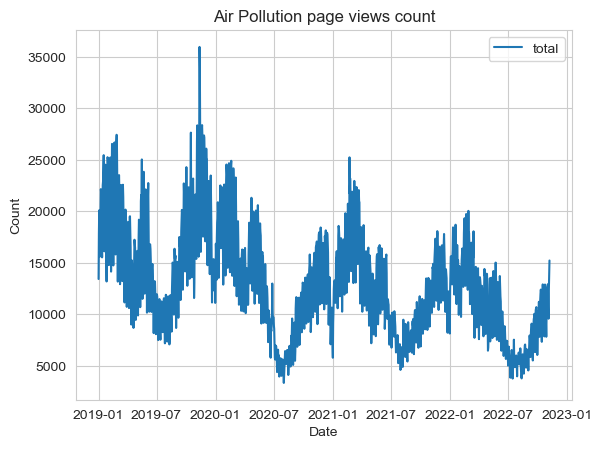

In [159]:
#sns.lineplot(y=airpol_views.en, x=airpol_views.date)
#sns.lineplot(y=airpol_views.da, x=airpol_views.date)
sns.lineplot(y=airpol_data.total, x=airpol_data.date)
plt.title("Air Pollution page views count")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(['total'])
plt.show()

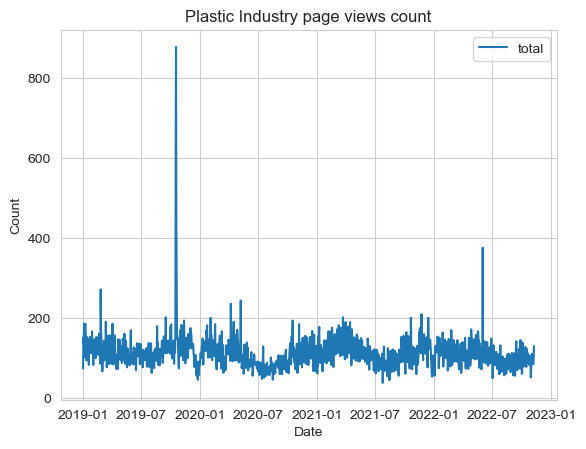

In [165]:
sns.lineplot(y=plastin_data.total, x=plastin_data.date)
plt.title("Plastic Industry page views count")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(['total'])
plt.show()

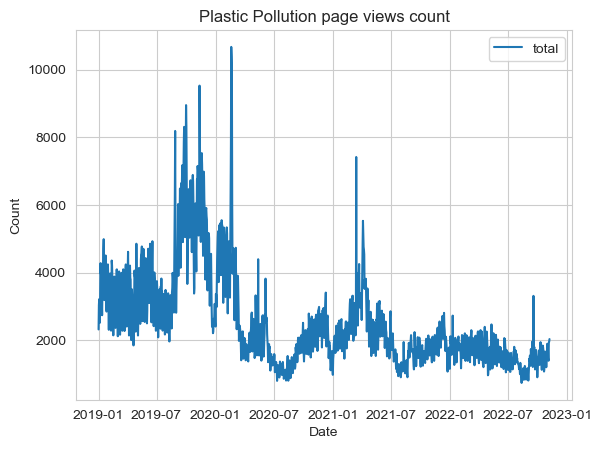

In [167]:
sns.lineplot(y=plastpol_data.total, x=plastpol_data.date)
plt.title("Plastic Pollution page views count")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(['total'])
plt.show()